In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap
import scipy.io as sio

%matplotlib inline

In [2]:
locpath='./'
locfile='Mean_profiles_moorings.mat'

mooring = sio.loadmat(locpath+locfile,squeeze_me=True)

In [3]:
mooring

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Aug  8 13:03:25 2012',
 '__version__': '1.0',
 '__globals__': [],
 'Zint': array([  50,   60,   70,   80,   90,  100,  110,  120,  130,  140,  150,
         160,  170,  180,  190,  200,  210,  220,  230,  240,  250,  260,
         270,  280,  290,  300,  310,  320,  330,  340,  350,  360,  370,
         380,  390,  400,  410,  420,  430,  440,  450,  460,  470,  480,
         490,  500,  510,  520,  530,  540,  550,  560,  570,  580,  590,
         600,  610,  620,  630,  640,  650,  660,  670,  680,  690,  700,
         710,  720,  730,  740,  750,  760,  770,  780,  790,  800,  810,
         820,  830,  840,  850,  860,  870,  880,  890,  900,  910,  920,
         930,  940,  950,  960,  970,  980,  990, 1000, 1010, 1020, 1030,
        1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140,
        1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250,
        1260, 1270, 1280, 1290, 1300, 13

In [4]:
mooring['dtB'].shape[0]

977

In [5]:
# Get a timestamp first for each of the 4 moorings 
time=[]
for moor in ['dtA','dtB','dtC','dtD']:
    for it in set(np.arange(mooring[moor].shape[0])):
        test=pd.to_datetime(str(mooring[moor][it][0])+' '+str(mooring[moor][it][1])+' '+str(mooring[moor][it][2]))
        time=np.append(time,test)
    # Transform a timestamp to timeindex
    final_time=pd.DatetimeIndex(time)

In [6]:
final_time

DatetimeIndex(['2003-08-15', '2003-08-16', '2003-08-19', '2003-08-21',
               '2003-08-23', '2003-08-25', '2003-08-28', '2003-08-30',
               '2003-09-01', '2003-09-03',
               ...
               '2011-07-21', '2011-07-23', '2011-07-26', '2011-07-28',
               '2011-07-30', '2011-08-01', '2011-08-04', '2011-08-06',
               '2011-08-08', '2011-08-10'],
              dtype='datetime64[ns]', length=3337, freq=None)

In [7]:
# Rebuild a simple Dataset
ds_BGOS=xr.Dataset()

In [17]:
ds_BGOS.coords['Zint']=mooring['Zint']
ds_BGOS['Zint'].attrs['name']='depth'
ds_BGOS['Zint'].attrs['units']='m'
ds_BGOS['VelA']=(('Zint','dtA'),mooring['VelA'])
ds_BGOS['UA']=(('Zint','dtA'),mooring['UA'])
ds_BGOS['VA']=(('Zint','dtA'),mooring['VA'])
ds_BGOS['TA']=(('Zint','dtA'),mooring['TA'])
ds_BGOS['SA']=(('Zint','dtA'),mooring['SA'])
ds_BGOS['N2A']=(('Zint','dtA'),mooring['N2A'])
ds_BGOS['RHOA']=(('Zint','dtA'),mooring['RHOA'])

ds_BGOS['VelB']=(('Zint','dtB'),mooring['VelB'])
ds_BGOS['UB']=(('Zint','dtB'),mooring['UB'])
ds_BGOS['VB']=(('Zint','dtB'),mooring['VB'])
ds_BGOS['TB']=(('Zint','dtB'),mooring['TB'])
ds_BGOS['SB']=(('Zint','dtB'),mooring['SB'])
ds_BGOS['N2B']=(('Zint','dtB'),mooring['N2B'])
ds_BGOS['RHOB']=(('Zint','dtB'),mooring['RHOB'])

ds_BGOS['VelC']=(('Zint','dtC'),mooring['VelC'])
ds_BGOS['UC']=(('Zint','dtC'),mooring['UC'])
ds_BGOS['VC']=(('Zint','dtC'),mooring['VC'])
ds_BGOS['TC']=(('Zint','dtC'),mooring['TC'])
ds_BGOS['SC']=(('Zint','dtC'),mooring['SC'])
ds_BGOS['N2C']=(('Zint','dtC'),mooring['N2C'])
ds_BGOS['RHOC']=(('Zint','dtC'),mooring['RHOC'])

ds_BGOS['VelD']=(('Zint','dtD'),mooring['VelD'])
ds_BGOS['UD']=(('Zint','dtD'),mooring['UD'])
ds_BGOS['VD']=(('Zint','dtD'),mooring['VD'])
ds_BGOS['TD']=(('Zint','dtD'),mooring['TD'])
ds_BGOS['SD']=(('Zint','dtD'),mooring['SD'])
ds_BGOS['N2D']=(('Zint','dtD'),mooring['N2D'])
ds_BGOS['RHOD']=(('Zint','dtD'),mooring['RHOD'])


In [9]:
# Rebuild a proper time-axis for each mooring
# Get a timestamp first for each of the 4 moorings 
for moor in ['dtA','dtB','dtC','dtD']:
    print(moor,mooring[moor].shape[0])
    time=[]
    for it in set(np.arange(mooring[moor].shape[0])):
        test=pd.to_datetime(str(mooring[moor][it][0])+' '+str(mooring[moor][it][1])+' '+str(mooring[moor][it][2]))
        time=np.append(time,test)
    # Transform a timestamp to timeindex
    ds_BGOS.coords[moor]=pd.DatetimeIndex(time)

dtA 773
dtB 977
dtC 644
dtD 943


In [37]:
# Save the data into a Netcdf file instead Matlab format
ldate=!date
ds_BGOS.attrs={'Global':'Beaufort Gyre Observing System 2003-2011 - https://www2.whoi.edu/site/beaufortgyre/ - '+ \
              ' Netcdf generated with BGOS_mooringsData_convert.ipynb relying on Mean_profiles_moorings.mat data file - '+ldate[0]}
ds_BGOS.to_netcdf('./Mean_profiles_BGOSmoorings.nc')

In [34]:
ldate[0]

'Tue Jun  6 15:28:45 CEST 2023'

In [38]:
ds_BGOS

<xarray.Dataset>
Dimensions:  (Zint: 196, dtA: 773, dtB: 977, dtC: 644, dtD: 943)
Coordinates:
  * Zint     (Zint) uint16 50 60 70 80 90 100 ... 1950 1960 1970 1980 1990 2000
  * dtA      (dtA) datetime64[ns] 2003-08-15 2003-08-16 ... 2011-07-28
  * dtB      (dtB) datetime64[ns] 2003-08-24 2003-08-25 ... 2010-09-29
  * dtC      (dtC) datetime64[ns] 2003-08-27 2003-08-28 ... 2007-08-29
  * dtD      (dtD) datetime64[ns] 2005-08-29 2005-08-30 ... 2011-08-10
Data variables: (12/28)
    VelA     (Zint, dtA) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    UA       (Zint, dtA) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    VA       (Zint, dtA) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    TA       (Zint, dtA) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    SA       (Zint, dtA) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    N2A      (Zint, dtA) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    ...       ...
    UD       (Zint, dtD) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    VD       (Zint, dtD) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    TD       (Zint, dtD) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    SD       (Zint, dtD) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    N2D      (Zint, dtD) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    RHOD     (Zint, dtD) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Global:   Beaufort Gyre Observing System 2003-2011 - https://www2.whoi.ed...

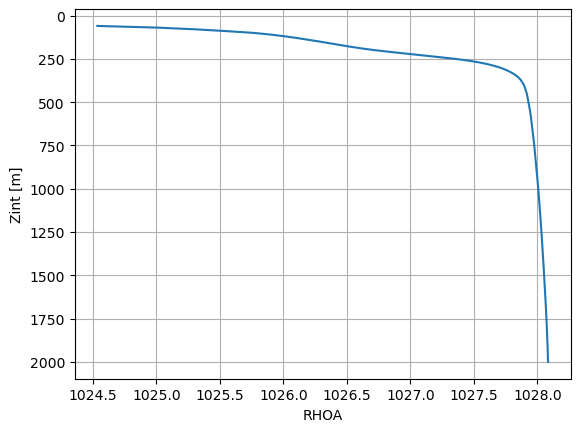

In [45]:
ds_BGOS['RHOA'].mean(dim='dtA').plot(y='Zint')
plt.grid(True)
plt.gca().invert_yaxis()

/tmp/ipykernel_2356/3764586790.py:3: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(mooring['VelB'][0:196,:],axis=1),-1.*mooring['Zint'],'g', linewidth=1, label='Obs')


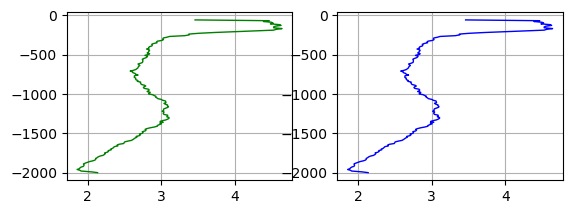

In [46]:
# Control 1 field 
plt.subplot(221)
plt.plot(np.nanmean(mooring['VelB'][0:196,:],axis=1),-1.*mooring['Zint'],'g', linewidth=1, label='Obs')
#plt.plot(ds_BGOS['VelB'],-1.*ds_BGOS['Zint'],'b', linewidth=2, label='Mean')
plt.grid(True)

plt.subplot(222)
plt.plot(ds_BGOS['VelB'].mean(dim='dtB'),-1.*ds_BGOS['Zint'],'b', linewidth=1, label='Mean')
plt.grid(True)
